<h1> Community and Crime </h1>
<h2> Investigation the top and lowest attributes correlated with crime</h2>

In [595]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

Examine the data by displaying contents of comma-separated file

In [596]:
df2 = pd.read_csv("communities.data", sep = ",")
df2.head(20)

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
5,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
6,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
7,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
8,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15
9,6,?,?,DalyCitycity,1,0.13,0.71,0.15,0.07,1.00,...,0.02,1.00,1.00,?,?,?,?,0.00,?,0.24


Assign labels to columns

In [597]:
df1 = pd.read_csv("communities.data", sep = ",", 
                 header=None,
                 names=["state", "county", "community",
                        "communityname", "fold", "population",
                        "householdsize", "racepctblack", "racePctWhite",
                        "racePctAsian", "racePctHisp", "agePct12t21",
                        "agePct12t29", "agePct16t24", "agePct65up",
                        "numbUrban", "pctUrban", "medIncome", "pctWWage",
                        "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst",
                        "pctWRetire", "medFamInc", "perCapInc", "whitePerCap",
                        "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap",
                        "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade",
                        "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy",
                        "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf",
                        "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv",
                        "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par",
                        "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg",
                        "PctIlleg", "NumImmig", "PctImmigRecent", 
                        "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
                        "PctRecentImmig", "PctRecImmig5", "PctRecImmig8",
                        "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell",
                        "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous",
                        "PersPerOwnOccHous", "PersPerRentOccHous",
                        "PctPersOwnOccup", "PctPersDenseHous",
                        "PctHousLess3BR", "MedNumBR", "HousVacant",
                        "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded",
                        "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone",
                        "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal",
                        "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ",
                        "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc",
                        "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet",
                        "PctForeignBorn", "PctBornSameState", "PctSameHouse85",
                        "PctSameCity85", "PctSameState85", "LemasSwornFT",
                        "LemasSwFTPerPop", "LemasSwFTFieldOps",
                        "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop",
                        "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol",
                        "PctPolicWhite", "PctPolicBlack", "PctPolicHisp",
                        "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits",
                        "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea",
                        "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg",
                        "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn",
                        "PolicBudgPerPop", "ViolentCrimesPerPop"])

<h2>Attribute Information: (122 predictive, 5 non-predictive, 1 goal)</h2>

 -- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal) 
-- county: numeric code for county - not predictive, and many missing values (numeric) 
-- community: numeric code for community - not predictive and many missing values (numeric) 
-- communityname: community name - not predictive - for information only (string) 
-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric) 
-- population: population for community: (numeric - decimal) 
-- householdsize: mean people per household (numeric - decimal) 
-- racepctblack: percentage of population that is african american (numeric - decimal) 
-- racePctWhite: percentage of population that is caucasian (numeric - decimal) 
-- racePctAsian: percentage of population that is of asian heritage (numeric - decimal) 
-- racePctHisp: percentage of population that is of hispanic heritage (numeric - decimal) 
-- agePct12t21: percentage of population that is 12-21 in age (numeric - decimal) 
-- agePct12t29: percentage of population that is 12-29 in age (numeric - decimal) 
-- agePct16t24: percentage of population that is 16-24 in age (numeric - decimal) 
-- agePct65up: percentage of population that is 65 and over in age (numeric - decimal) 
-- numbUrban: number of people living in areas classified as urban (numeric - decimal) 
-- pctUrban: percentage of people living in areas classified as urban (numeric - decimal) 
-- medIncome: median household income (numeric - decimal) 
-- pctWWage: percentage of households with wage or salary income in 1989 (numeric - decimal) 
-- pctWFarmSelf: percentage of households with farm or self employment income in 1989 (numeric - decimal) 
-- pctWInvInc: percentage of households with investment / rent income in 1989 (numeric - decimal) 
-- pctWSocSec: percentage of households with social security income in 1989 (numeric - decimal) 
-- pctWPubAsst: percentage of households with public assistance income in 1989 (numeric - decimal) 
-- pctWRetire: percentage of households with retirement income in 1989 (numeric - decimal) 
-- medFamInc: median family income (differs from household income for non-family households) (numeric - decimal) 
-- perCapInc: per capita income (numeric - decimal) 
-- whitePerCap: per capita income for caucasians (numeric - decimal) 
-- blackPerCap: per capita income for african americans (numeric - decimal) 
-- indianPerCap: per capita income for native americans (numeric - decimal) 
-- AsianPerCap: per capita income for people with asian heritage (numeric - decimal) 
-- OtherPerCap: per capita income for people with 'other' heritage (numeric - decimal) 
-- HispPerCap: per capita income for people with hispanic heritage (numeric - decimal) 
-- NumUnderPov: number of people under the poverty level (numeric - decimal) 
-- PctPopUnderPov: percentage of people under the poverty level (numeric - decimal) 
-- PctLess9thGrade: percentage of people 25 and over with less than a 9th grade education (numeric - decimal) 
-- PctNotHSGrad: percentage of people 25 and over that are not high school graduates (numeric - decimal) 
-- PctBSorMore: percentage of people 25 and over with a bachelors degree or higher education (numeric - decimal) 
-- PctUnemployed: percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal) 
-- PctEmploy: percentage of people 16 and over who are employed (numeric - decimal) 
-- PctEmplManu: percentage of people 16 and over who are employed in manufacturing (numeric - decimal) 
-- PctEmplProfServ: percentage of people 16 and over who are employed in professional services (numeric - decimal) 
-- PctOccupManu: percentage of people 16 and over who are employed in manufacturing (numeric - decimal) ######## 
-- PctOccupMgmtProf: percentage of people 16 and over who are employed in management or professional occupations (numeric - decimal) 
-- MalePctDivorce: percentage of males who are divorced (numeric - decimal) 
-- MalePctNevMarr: percentage of males who have never married (numeric - decimal) 
-- FemalePctDiv: percentage of females who are divorced (numeric - decimal) 
-- TotalPctDiv: percentage of population who are divorced (numeric - decimal) 
-- PersPerFam: mean number of people per family (numeric - decimal) 
-- PctFam2Par: percentage of families (with kids) that are headed by two parents (numeric - decimal) 
-- PctKids2Par: percentage of kids in family housing with two parents (numeric - decimal) 
-- PctYoungKids2Par: percent of kids 4 and under in two parent households (numeric - decimal) 
-- PctTeen2Par: percent of kids age 12-17 in two parent households (numeric - decimal) 
-- PctWorkMomYoungKids: percentage of moms of kids 6 and under in labor force (numeric - decimal) 
-- PctWorkMom: percentage of moms of kids under 18 in labor force (numeric - decimal) 
-- NumIlleg: number of kids born to never married (numeric - decimal) 
-- PctIlleg: percentage of kids born to never married (numeric - decimal) 
-- NumImmig: total number of people known to be foreign born (numeric - decimal) 
-- PctImmigRecent: percentage of _immigrants_ who immigated within last 3 years (numeric - decimal) 
-- PctImmigRec5: percentage of _immigrants_ who immigated within last 5 years (numeric - decimal) 
-- PctImmigRec8: percentage of _immigrants_ who immigated within last 8 years (numeric - decimal) 
-- PctImmigRec10: percentage of _immigrants_ who immigated within last 10 years (numeric - decimal) 
-- PctRecentImmig: percent of _population_ who have immigrated within the last 3 years (numeric - decimal) 
-- PctRecImmig5: percent of _population_ who have immigrated within the last 5 years (numeric - decimal) 
-- PctRecImmig8: percent of _population_ who have immigrated within the last 8 years (numeric - decimal) 
-- PctRecImmig10: percent of _population_ who have immigrated within the last 10 years (numeric - decimal) 
-- PctSpeakEnglOnly: percent of people who speak only English (numeric - decimal) 
-- PctNotSpeakEnglWell: percent of people who do not speak English well (numeric - decimal) 
-- PctLargHouseFam: percent of family households that are large (6 or more) (numeric - decimal) 
-- PctLargHouseOccup: percent of all occupied households that are large (6 or more people) (numeric - decimal) 
-- PersPerOccupHous: mean persons per household (numeric - decimal) 
-- PersPerOwnOccHous: mean persons per owner occupied household (numeric - decimal) 
-- PersPerRentOccHous: mean persons per rental household (numeric - decimal) 
-- PctPersOwnOccup: percent of people in owner occupied households (numeric - decimal) 
-- PctPersDenseHous: percent of persons in dense housing (more than 1 person per room) (numeric - decimal) 
-- PctHousLess3BR: percent of housing units with less than 3 bedrooms (numeric - decimal) 
-- MedNumBR: median number of bedrooms (numeric - decimal) 
-- HousVacant: number of vacant households (numeric - decimal) 
-- PctHousOccup: percent of housing occupied (numeric - decimal) 
-- PctHousOwnOcc: percent of households owner occupied (numeric - decimal) 
-- PctVacantBoarded: percent of vacant housing that is boarded up (numeric - decimal) 
-- PctVacMore6Mos: percent of vacant housing that has been vacant more than 6 months (numeric - decimal) 
-- MedYrHousBuilt: median year housing units built (numeric - decimal) 
-- PctHousNoPhone: percent of occupied housing units without phone (in 1990, this was rare!) (numeric - decimal) 
-- PctWOFullPlumb: percent of housing without complete plumbing facilities (numeric - decimal) 
-- OwnOccLowQuart: owner occupied housing - lower quartile value (numeric - decimal) 
-- OwnOccMedVal: owner occupied housing - median value (numeric - decimal) 
-- OwnOccHiQuart: owner occupied housing - upper quartile value (numeric - decimal) 
-- RentLowQ: rental housing - lower quartile rent (numeric - decimal) 
-- RentMedian: rental housing - median rent (Census variable H32B from file STF1A) (numeric - decimal) 
-- RentHighQ: rental housing - upper quartile rent (numeric - decimal) 
-- MedRent: median gross rent (Census variable H43A from file STF3A - includes utilities) (numeric - decimal) 
-- MedRentPctHousInc: median gross rent as a percentage of household income (numeric - decimal) 
-- MedOwnCostPctInc: median owners cost as a percentage of household income - for owners with a mortgage (numeric - decimal) 
-- MedOwnCostPctIncNoMtg: median owners cost as a percentage of household income - for owners without a mortgage (numeric - decimal) 
-- NumInShelters: number of people in homeless shelters (numeric - decimal) 
-- NumStreet: number of homeless people counted in the street (numeric - decimal) 
-- PctForeignBorn: percent of people foreign born (numeric - decimal) 
-- PctBornSameState: percent of people born in the same state as currently living (numeric - decimal) 
-- PctSameHouse85: percent of people living in the same house as in 1985 (5 years before) (numeric - decimal) 
-- PctSameCity85: percent of people living in the same city as in 1985 (5 years before) (numeric - decimal) 
-- PctSameState85: percent of people living in the same state as in 1985 (5 years before) (numeric - decimal) 
-- LemasSwornFT: number of sworn full time police officers (numeric - decimal) 
-- LemasSwFTPerPop: sworn full time police officers per 100K population (numeric - decimal) 
-- LemasSwFTFieldOps: number of sworn full time police officers in field operations (on the street as opposed to administrative etc) (numeric - decimal) 
-- LemasSwFTFieldPerPop: sworn full time police officers in field operations (on the street as opposed to administrative etc) per 100K population (numeric - decimal) 
-- LemasTotalReq: total requests for police (numeric - decimal) 
-- LemasTotReqPerPop: total requests for police per 100K popuation (numeric - decimal) 
-- PolicReqPerOffic: total requests for police per police officer (numeric - decimal) 
-- PolicPerPop: police officers per 100K population (numeric - decimal) 
-- RacialMatchCommPol: a measure of the racial match between the community and the police force. High values indicate proportions in community and police force are similar (numeric - decimal) 
-- PctPolicWhite: percent of police that are caucasian (numeric - decimal) 
-- PctPolicBlack: percent of police that are african american (numeric - decimal) 
-- PctPolicHisp: percent of police that are hispanic (numeric - decimal) 
-- PctPolicAsian: percent of police that are asian (numeric - decimal) 
-- PctPolicMinor: percent of police that are minority of any kind (numeric - decimal) 
-- OfficAssgnDrugUnits: number of officers assigned to special drug units (numeric - decimal) 
-- NumKindsDrugsSeiz: number of different kinds of drugs seized (numeric - decimal) 
-- PolicAveOTWorked: police average overtime worked (numeric - decimal) 
-- LandArea: land area in square miles (numeric - decimal) 
-- PopDens: population density in persons per square mile (numeric - decimal) 
-- PctUsePubTrans: percent of people using public transit for commuting (numeric - decimal) 
-- PolicCars: number of police cars (numeric - decimal) 
-- PolicOperBudg: police operating budget (numeric - decimal) 
-- LemasPctPolicOnPatr: percent of sworn full time police officers on patrol (numeric - decimal) 
-- LemasGangUnitDeploy: gang unit deployed (numeric - decimal - but really ordinal - 0 means NO, 1 means YES, 0.5 means Part Time) 
-- LemasPctOfficDrugUn: percent of officers assigned to drug units (numeric - decimal) 
-- PolicBudgPerPop: police operating budget per population (numeric - decimal) 
-- ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted) 

Show that columns have been labelled

In [598]:
df1.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


<h2>Find all '?' (missing values) in the dataframe</h2>

Some columns contain many '?'.  Show twenty columns of the dataframe at a time

In [599]:
df1.iloc[:,0:19].head(10)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.00,0.31,0.72
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.00,0.30,0.58
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.00,0.58,0.89
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.90,0.50,0.72
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,0.04,1.00,0.52,0.68
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,0.02,0.81,0.42,0.50
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,0.00,0.00,0.16,0.44
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,0.04,1.00,0.17,0.47
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,0.02,1.00,0.54,0.59


In [600]:
df1.iloc[:,20:39].head(10)

,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy
0,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68
1,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73
2,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58
3,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71
4,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65
5,0.61,0.28,0.15,0.25,0.62,0.72,0.76,0.77,0.28,0.52,0.48,0.60,0.01,0.12,0.13,0.12,0.80,0.10,0.65
6,0.68,0.61,0.21,0.54,0.43,0.47,0.44,0.40,0.24,0.86,0.24,0.36,0.01,0.11,0.29,0.41,0.36,0.28,0.54
7,0.23,0.53,0.97,0.41,0.15,0.10,0.12,0.08,0.17,0.27,0.18,0.21,0.03,0.64,0.96,0.82,0.12,1.00,0.26
8,0.34,0.55,0.48,0.43,0.21,0.23,0.23,0.19,0.10,0.26,0.29,0.22,0.04,0.45,0.52,0.59,0.17,0.55,0.43
9,0.86,0.42,0.02,0.31,0.85,0.89,0.94,0.11,0.09,0.33,0.17,0.80,0.00,0.11,0.04,0.03,1.00,0.11,0.44


In [601]:
df1.iloc[:,40:59].head(10)

,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5
0,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27
1,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62
2,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06
3,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20
4,0.38,0.42,0.46,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07
5,0.77,0.06,0.91,0.49,0.57,0.61,0.58,0.44,0.62,0.69,0.87,0.53,0.30,0.43,0.00,0.11,0.04,0.30,0.35
6,0.53,0.33,0.49,0.25,0.34,0.28,0.28,0.42,0.77,0.81,0.79,0.74,0.57,0.62,0.00,0.13,0.01,0.00,0.02
7,0.34,0.71,0.18,0.38,0.47,0.59,0.52,0.78,0.45,0.43,0.34,0.34,0.29,0.27,0.02,0.50,0.02,0.50,0.59
8,0.36,0.64,0.29,0.62,0.26,0.66,0.67,0.37,0.51,0.55,0.58,0.47,0.65,0.64,0.02,0.29,0.00,0.12,0.09
9,1.00,0.02,0.96,0.30,0.85,0.39,0.36,0.31,0.65,0.73,0.78,0.67,0.72,0.71,0.00,0.07,0.01,0.41,0.44


In [602]:
df1.iloc[:,60:79].head(10)

,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc
0,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52
1,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24
2,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41
3,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96
4,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87
5,0.47,0.50,0.50,0.56,0.57,0.45,0.28,0.25,0.19,0.29,0.53,0.18,0.39,0.26,0.73,0.0,0.02,0.84,0.30
6,0.10,0.00,0.01,0.01,0.03,0.73,0.05,0.12,0.13,0.42,0.54,0.24,0.65,0.03,0.46,0.5,0.01,0.89,0.57
7,0.59,0.69,0.72,0.71,0.60,0.12,0.93,0.74,0.75,0.80,0.68,0.92,0.39,0.89,0.66,0.0,0.01,0.91,0.46
8,0.13,0.00,0.00,0.00,0.00,0.99,0.01,0.12,0.12,0.35,0.38,0.33,0.50,0.10,0.64,0.0,0.04,0.72,0.49
9,0.48,0.22,0.21,0.22,0.19,0.85,0.03,0.09,0.06,0.15,0.34,0.05,0.48,0.03,0.58,0.0,0.02,0.72,0.38


In [603]:
df1.iloc[:,80:99].head(10)

,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85
0,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50
1,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34
2,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54
3,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73
4,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64
5,0.28,0.25,0.02,0.05,0.94,1.00,1.00,0.67,0.63,0.68,0.62,0.47,0.59,0.11,0.00,0.0,0.70,0.42,0.49
6,0.49,0.38,0.05,0.05,0.37,0.38,0.39,0.26,0.35,0.42,0.35,0.46,0.44,0.31,0.00,0.0,0.15,0.81,0.77
7,0.37,0.60,0.28,0.23,0.15,0.13,0.13,0.21,0.24,0.25,0.24,0.64,0.59,0.28,0.00,0.0,0.59,0.58,0.52
8,0.49,0.50,0.57,0.22,0.07,0.07,0.08,0.14,0.17,0.16,0.15,0.38,0.13,0.36,0.01,0.0,0.01,0.78,0.48
9,0.47,0.04,0.01,0.00,0.63,0.71,0.79,0.44,0.42,0.47,0.41,0.23,0.27,0.28,0.00,0.0,0.22,0.42,0.34


In [604]:
df1.iloc[:,100:119].head(10)

,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea
0,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12
1,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02
2,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01
3,0.65,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02
4,0.53,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.04
5,0.64,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01
6,0.84,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.05
7,0.78,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01
8,0.75,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.04
9,0.09,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.00


In [605]:
df1.iloc[:,120:].head(10)

,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.45,?,?,?,?,0.00,?,0.67
2,0.02,?,?,?,?,0.00,?,0.43
3,0.28,?,?,?,?,0.00,?,0.12
4,0.02,?,?,?,?,0.00,?,0.03
5,0.10,?,?,?,?,0.00,?,0.14
6,0.06,?,?,?,?,0.00,?,0.03
7,0.00,?,?,?,?,0.00,?,0.55
8,0.04,?,?,?,?,0.00,?,0.53
9,0.11,?,?,?,?,0.00,?,0.15


<h2>Drop columns with many '?'s</h2>

In [606]:
df_dropped = df1.drop(columns = ["county", "community", "state", "fold",
                                 "communityname", "LemasSwornFT",
                                "LemasSwFTPerPop", "LemasSwFTFieldOps",
                                "LemasSwFTFieldPerPop", "LemasTotalReq",
                                "LemasTotReqPerPop", "PolicReqPerOffic",
                                "PolicPerPop", "RacialMatchCommPol",
                                "PctPolicWhite", "PctPolicBlack",
                                "PctPolicHisp", "PctPolicAsian",
                                "PctPolicMinor", "OfficAssgnDrugUnits",
                                "NumKindsDrugsSeiz", "PolicAveOTWorked",
                                "PolicCars",
                                "PolicOperBudg", "LemasPctPolicOnPatr",
                                "LemasGangUnitDeploy", "PolicBudgPerPop", ])

Show that dropped dataframe does not contain columns with many '?'s.  Removing rows instead with '?' could result in insufficient amount of data.

In [607]:
df_dropped.head(20)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.00,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.00,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.00,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.00,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.00,0.15


<h2>Find any additional '?'s and drop rows with those values</h2>

Find location of '?' in the dataframe.  We know that there is at least one present from an error message

In [608]:
for i in range(len(df_dropped.iloc[i])):
    for j in range(1196):
        if df_dropped.iloc[j,i] == "?":
            print "The column containing the '?'' is: ", i
            print "The row containing the '? is: ", j

The column containing the '?'' is:  25
The row containing the '? is:  130


Demonstrate that that location contains '?'

In [609]:
df_dropped.iloc[130,25]

'?'

Drop the row containing the '?'

In [610]:
df_dropped.drop(130, axis=0, inplace=True)

<h2>Random Forest Regressor</h2>

Split the data into training and test sets

In [611]:
pointers = df_dropped.loc[:,"population":"LemasPctOfficDrugUn"]
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
X_train.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
906,0.16,0.51,0.19,0.42,0.96,0.44,0.37,0.54,0.33,0.33,...,0.04,0.63,0.49,0.43,0.63,0.68,0.12,0.21,0.45,0.77
1666,0.00,0.55,0.24,0.81,0.03,0.01,0.51,0.45,0.28,0.24,...,0.00,0.03,0.70,0.57,0.53,0.69,0.03,0.08,0.00,0.00
1265,0.10,0.40,0.39,0.65,0.03,0.07,0.44,0.48,0.32,0.41,...,0.02,0.07,0.69,0.46,0.59,0.76,0.15,0.11,0.01,0.56
758,0.02,0.71,0.17,0.41,0.72,0.64,0.41,0.45,0.28,0.32,...,0.00,0.82,0.45,0.55,0.84,0.75,0.02,0.24,0.18,0.00
1085,0.05,0.38,0.24,0.80,0.07,0.01,0.74,0.75,0.72,0.41,...,0.00,0.04,0.73,0.37,0.54,0.68,0.08,0.12,0.02,0.00
1512,0.25,0.37,0.40,0.62,0.13,0.05,0.57,0.66,0.55,0.46,...,0.12,0.19,0.75,0.45,0.66,0.67,0.07,0.55,0.61,0.78
1057,0.01,0.42,0.07,0.92,0.08,0.02,0.35,0.40,0.25,0.44,...,0.00,0.04,0.76,0.64,0.73,0.78,0.04,0.10,0.03,0.00
1710,0.18,1.00,0.00,0.56,0.02,1.00,0.67,0.65,0.45,0.23,...,0.00,0.73,0.69,0.68,0.80,0.76,0.09,0.31,0.20,0.44
1465,0.35,0.48,0.13,0.71,0.30,0.07,0.41,0.54,0.32,0.08,...,0.08,0.17,0.20,0.30,0.46,0.28,1.00,0.01,0.14,0.62
1612,0.06,0.97,0.21,0.21,0.35,1.00,0.57,0.69,0.46,0.17,...,0.00,1.00,0.42,0.34,0.81,0.72,0.01,0.85,0.20,0.00


Try to maximize the score by tuning parameters with GridSearchCV

In [612]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None, 5, 10, 15],
    'min_impurity_decrease' : [1e-8, 1e-7, 1e-6]
}
rf = RandomForestRegressor()
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'min_impurity_decrease': [1e-08, 1e-07, 1e-06], 'max_depth': [None, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [613]:
CV_rfc.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_impurity_decrease': 1e-06,
 'n_estimators': 500}

Use the parameters found in GridSearch to make a model

In [614]:
clf = RandomForestRegressor(n_estimators=500, bootstrap="True", max_depth=10, min_samples_split=5, 
                             min_impurity_decrease=1e-6, random_state=10, max_features="sqrt")

**Score with "All" dataset**

In [615]:
clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
allData = clf.score(X_test, y_test)

0.6628331005768571


The following parameters were found by initial, manual search to fit a model with a better score

In [616]:
clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

In [617]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6647774305387656

Use the above parameters for further testing

<h2>Linear Regression</h2>

Apply a linear regression model to predict the crime.  A lower score is better, and the training set has a lower score than the test set, which is expected.

In [618]:
model = LinearRegression()

# Fit model with training data
model.fit(X_train, y_train)

# Coefficients
print 'Coefficients of model :', model.coef_

# Intercept
print 'Intercept of model',model.intercept_

# Predict the target with training data
predict_train = model.predict(X_train)

# Calculate and print RMSE on training data
rmse_train = mean_squared_error(y_train,predict_train)**0.5
print 'RMSE on train dataset : ', rmse_train

# Predict the target on the test data
predict_test = model.predict(X_test) 

# Calculate and print RMSE on test data
rmse_test = mean_squared_error(y_test,predict_test)**0.5
print 'RMSE on test dataset : ', rmse_test

Coefficients of model : [-0.21507688 -0.08916533  0.24393052  0.01659453  0.00518884  0.0853115
  0.19754657 -0.30302181 -0.24865683 -0.11472994 -0.01514345  0.04083802
 -0.40217279 -0.16788299  0.05482426 -0.1631297   0.2283865   0.01324101
 -0.1258551   0.33050381  0.04340838 -0.26343439  0.00763573 -0.04136567
  0.01264732  0.04341893  0.07478368 -0.01011475 -0.17883636 -0.10836428
  0.03910673  0.05907798  0.03279654  0.19887482 -0.05551127 -0.01300807
  0.04116545  0.07839377  0.59000051  0.23391227  0.31934436 -0.8725319
 -0.0645821   0.00961214 -0.39981764 -0.02511614  0.05385558  0.06811456
 -0.18063565 -0.02222407  0.13341226 -0.07296438  0.038531   -0.01622193
  0.06607997 -0.04401944  0.04401525 -0.10677207 -0.16548267  0.3014803
 -0.08321185 -0.18310203 -0.22348468  0.07880567  0.82056338 -0.24471554
 -0.35011258 -0.7325458   0.14737443  0.0747777   0.02117108  0.2235514
 -0.02970108  0.55557719  0.05758477 -0.059831   -0.0091358  -0.02299522
 -0.01328449  0.0429342  -0.143

Further work could be conducted to determine whether a linear model or random forest model is more accurate at predictions

<h2>Further Testing with Random Forest Model</h2>

<h3>Drop Population Column</h3>

In [619]:
pointers = df_dropped.loc[:,"householdsize":"LemasPctOfficDrugUn"]
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
X_train.head(10)

,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
906,0.51,0.19,0.42,0.96,0.44,0.37,0.54,0.33,0.33,0.18,...,0.04,0.63,0.49,0.43,0.63,0.68,0.12,0.21,0.45,0.77
1666,0.55,0.24,0.81,0.03,0.01,0.51,0.45,0.28,0.24,0.02,...,0.00,0.03,0.70,0.57,0.53,0.69,0.03,0.08,0.00,0.00
1265,0.40,0.39,0.65,0.03,0.07,0.44,0.48,0.32,0.41,0.11,...,0.02,0.07,0.69,0.46,0.59,0.76,0.15,0.11,0.01,0.56
758,0.71,0.17,0.41,0.72,0.64,0.41,0.45,0.28,0.32,0.03,...,0.00,0.82,0.45,0.55,0.84,0.75,0.02,0.24,0.18,0.00
1085,0.38,0.24,0.80,0.07,0.01,0.74,0.75,0.72,0.41,0.00,...,0.00,0.04,0.73,0.37,0.54,0.68,0.08,0.12,0.02,0.00
1512,0.37,0.40,0.62,0.13,0.05,0.57,0.66,0.55,0.46,0.26,...,0.12,0.19,0.75,0.45,0.66,0.67,0.07,0.55,0.61,0.78
1057,0.42,0.07,0.92,0.08,0.02,0.35,0.40,0.25,0.44,0.03,...,0.00,0.04,0.76,0.64,0.73,0.78,0.04,0.10,0.03,0.00
1710,1.00,0.00,0.56,0.02,1.00,0.67,0.65,0.45,0.23,0.19,...,0.00,0.73,0.69,0.68,0.80,0.76,0.09,0.31,0.20,0.44
1465,0.48,0.13,0.71,0.30,0.07,0.41,0.54,0.32,0.08,0.35,...,0.08,0.17,0.20,0.30,0.46,0.28,1.00,0.01,0.14,0.62
1612,0.97,0.21,0.21,0.35,1.00,0.57,0.69,0.46,0.17,0.08,...,0.00,1.00,0.42,0.34,0.81,0.72,0.01,0.85,0.20,0.00


**Score with "All-1" dataset**

Removing the population statistic results in a slightly worse score with Random Forest Regressor

In [620]:
clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
allExceptPop = clf.score(X_test, y_test)

0.661663386933327


<h3>Drop householdsize Column</h3>

In [621]:
pointers = df_dropped.loc[:,"racepctblack":"LemasPctOfficDrugUn"]
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
X_train.head(10)

,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
906,0.19,0.42,0.96,0.44,0.37,0.54,0.33,0.33,0.18,1.00,...,0.04,0.63,0.49,0.43,0.63,0.68,0.12,0.21,0.45,0.77
1666,0.24,0.81,0.03,0.01,0.51,0.45,0.28,0.24,0.02,1.00,...,0.00,0.03,0.70,0.57,0.53,0.69,0.03,0.08,0.00,0.00
1265,0.39,0.65,0.03,0.07,0.44,0.48,0.32,0.41,0.11,1.00,...,0.02,0.07,0.69,0.46,0.59,0.76,0.15,0.11,0.01,0.56
758,0.17,0.41,0.72,0.64,0.41,0.45,0.28,0.32,0.03,1.00,...,0.00,0.82,0.45,0.55,0.84,0.75,0.02,0.24,0.18,0.00
1085,0.24,0.80,0.07,0.01,0.74,0.75,0.72,0.41,0.00,0.00,...,0.00,0.04,0.73,0.37,0.54,0.68,0.08,0.12,0.02,0.00
1512,0.40,0.62,0.13,0.05,0.57,0.66,0.55,0.46,0.26,1.00,...,0.12,0.19,0.75,0.45,0.66,0.67,0.07,0.55,0.61,0.78
1057,0.07,0.92,0.08,0.02,0.35,0.40,0.25,0.44,0.03,1.00,...,0.00,0.04,0.76,0.64,0.73,0.78,0.04,0.10,0.03,0.00
1710,0.00,0.56,0.02,1.00,0.67,0.65,0.45,0.23,0.19,1.00,...,0.00,0.73,0.69,0.68,0.80,0.76,0.09,0.31,0.20,0.44
1465,0.13,0.71,0.30,0.07,0.41,0.54,0.32,0.08,0.35,0.98,...,0.08,0.17,0.20,0.30,0.46,0.28,1.00,0.01,0.14,0.62
1612,0.21,0.21,0.35,1.00,0.57,0.69,0.46,0.17,0.08,1.00,...,0.00,1.00,0.42,0.34,0.81,0.72,0.01,0.85,0.20,0.00


**Score with "All-2" dataset**

Removing the householdsize statistic results in a slightly better score with Random Forest Regressor.  This may be due to the fact that too many parameters can lead to overfitting resulting in a lower test score.

In [622]:
clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
allExceptPopHousehold = clf.score(X_test, y_test)

0.6662467297872421


<h3>Drop racepct and agepct Columns</h3>

In [623]:
pointers = df_dropped.loc[:,"numbUrban":"LemasPctOfficDrugUn"]
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
X_train.head(10)

,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
906,0.18,1.00,0.40,0.64,0.16,0.40,0.38,0.48,0.50,0.39,...,0.04,0.63,0.49,0.43,0.63,0.68,0.12,0.21,0.45,0.77
1666,0.02,1.00,0.48,0.70,0.66,0.54,0.30,0.13,0.40,0.48,...,0.00,0.03,0.70,0.57,0.53,0.69,0.03,0.08,0.00,0.00
1265,0.11,1.00,0.23,0.52,0.34,0.39,0.46,0.28,0.35,0.25,...,0.02,0.07,0.69,0.46,0.59,0.76,0.15,0.11,0.01,0.56
758,0.03,1.00,0.43,0.67,0.21,0.38,0.36,0.45,0.29,0.41,...,0.00,0.82,0.45,0.55,0.84,0.75,0.02,0.24,0.18,0.00
1085,0.00,0.00,0.14,0.49,0.41,0.37,0.48,0.46,0.40,0.20,...,0.00,0.04,0.73,0.37,0.54,0.68,0.08,0.12,0.02,0.00
1512,0.26,1.00,0.16,0.40,0.10,0.41,0.53,0.62,0.51,0.21,...,0.12,0.19,0.75,0.45,0.66,0.67,0.07,0.55,0.61,0.78
1057,0.03,1.00,0.44,0.68,0.40,0.70,0.45,0.06,0.56,0.47,...,0.00,0.04,0.76,0.64,0.73,0.78,0.04,0.10,0.03,0.00
1710,0.19,1.00,0.11,0.58,0.39,0.14,0.39,0.82,0.17,0.09,...,0.00,0.73,0.69,0.68,0.80,0.76,0.09,0.31,0.20,0.44
1465,0.35,0.98,0.53,0.86,0.39,0.89,0.10,0.30,0.32,0.53,...,0.08,0.17,0.20,0.30,0.46,0.28,1.00,0.01,0.14,0.62
1612,0.08,1.00,0.29,0.67,0.06,0.16,0.27,0.66,0.24,0.25,...,0.00,1.00,0.42,0.34,0.81,0.72,0.01,0.85,0.20,0.00


**Score with "All-3" dataset**

Removing the racepct and agepct statistic results in a slightly worse score with random forest regressor

In [624]:
clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
allNumbUrban = clf.score(X_test, y_test)

0.6580242291421158


<h3>Drop urban Columns</h3>

**Score with "All-4" dataset**

In [625]:
pointers = df_dropped.loc[:,"medIncome":"LemasPctOfficDrugUn"]
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
X_train.head(10)

clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
allMedIncome = clf.score(X_test, y_test)

0.6603054421601149


<h3>Drop medIncome Column</h3>

**Score with "All-5" dataset**

In [626]:
pointers = df_dropped.loc[:,"pctWWage":"LemasPctOfficDrugUn"]
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
X_train.head(10)

clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
allpctWWage = clf.score(X_test, y_test)

0.6574503737624746


These calculations show that removing features generally reduces the score of the model.

Let's look at ranking each feature by recursive feature elimination (RFE). "\[RFE\] works by recursively removing attributes and building a model on those attributes that remain.  It uses the model accuracy to identify which attributes contribute the most to predicting the target attribute." (https://machinelearningmastery.com/feature-selection-machine-learning-python/)

<h2>Ranking of three features by RFE</h2>

"Removing features of low importance can improve accuracy, and reduce both model complexity and overfitting."

"Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class)."

https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7

In [627]:
X = df_dropped.loc[:,"population":"LemasPctOfficDrugUn"]
Y = df_dropped.loc[:,"ViolentCrimesPerPop"]
# feature extraction

clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")
rfe = RFE(clf, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
Feature Ranking: [83 87 22  1 88 42 59 69 85 35 46 97 84 51 36 17 73 38 57 72 94 75 54 65
  7 16 23 39 13 56 82 67 44 63 34 30 19 78  5 71 10 29 92  3  1 26 48 32
  9 11  1 64 24 60 53 31 80 90 95 96 28 58 15 76 86 55 40 68  2  8 98  4
 25 47 14 50 41 61 33 77 91 62 81 89 74 37 27 12 20 79 18 45  6 52 43 70
 66 49 21 93]


In [628]:
feature_rank = {}

for i in range(len(fit.ranking_)):
    feature_rank[df_dropped.columns.values[i]] = fit.ranking_[i]

d_view = [ (v,k) for k,v in feature_rank.iteritems() ]
d_view.sort() # natively sort tuples by first element

for v,k in d_view:
    print "%s: %d" % (k,v)

PctIlleg: 1
PctKids2Par: 1
racePctWhite: 1
PctPersDenseHous: 2
PctFam2Par: 3
HousVacant: 4
MalePctDivorce: 5
PctBornSameState: 6
AsianPerCap: 7
PctHousLess3BR: 8
PctWorkMom: 9
FemalePctDiv: 10
NumIlleg: 11
MedOwnCostPctInc: 12
PctPopUnderPov: 13
PctVacantBoarded: 14
PctLargHouseFam: 15
OtherPerCap: 16
pctWInvInc: 17
NumStreet: 18
PctOccupManu: 19
MedOwnCostPctIncNoMtg: 20
PctUsePubTrans: 21
racepctblack: 22
HispPerCap: 23
PctImmigRecent: 24
PctHousOccup: 25
PctYoungKids2Par: 26
MedRentPctHousInc: 27
PctSpeakEnglOnly: 28
TotalPctDiv: 29
PctEmplProfServ: 30
PctImmigRec10: 31
PctWorkMomYoungKids: 32
PctWOFullPlumb: 33
PctEmplManu: 34
agePct65up: 35
pctWFarmSelf: 36
MedRent: 37
pctWPubAsst: 38
NumUnderPov: 39
PersPerRentOccHous: 40
MedYrHousBuilt: 41
racePctHisp: 42
PctSameCity85: 43
PctUnemployed: 44
PctForeignBorn: 45
numbUrban: 46
PctHousOwnOcc: 47
PctTeen2Par: 48
PopDens: 49
PctVacMore6Mos: 50
pctWWage: 51
PctSameHouse85: 52
PctImmigRec8: 53
blackPerCap: 54
PersPerOwnOccHous: 55
PctLes

<h4>Top three factors by RFE</h4>

**PctIlleg:** percentage of kids born to never married (numeric - decimal) 

**PctKids2Par:** percentage of kids in family housing with two parents (numeric - decimal) 

**racePctWhite:** percentage of population that is caucasian (numeric - decimal)

<h4>Bottom three factors by RFE</h4>

**MedNumBR:** percentage of population that is of asian heritage (numeric - decimal)

**pctUrban:** percentage of people living in areas classified as urban (numeric - decimal)

**PctRecImmig10:** percent of population who have immigrated within the last 10 years (numeric - decimal) 

In [629]:
topThreeFactors = df_dropped.loc[:,["PctIlleg","PctKids2Par", "racePctWhite"]]
print topThreeFactors.head()

   PctIlleg  PctKids2Par  racePctWhite
0      0.14         0.59          0.90
1      0.24         0.47          0.74
2      0.46         0.44          0.56
3      0.33         0.54          0.08
4      0.06         0.91          0.95


In [630]:
pointers = topThreeFactors
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
top3 = clf.score(X_test, y_test)

0.5817363930158151


In [631]:
bottomThreeFactors = df_dropped.loc[:,["PctRecImmig10","pctUrban", "MedNumBR"]]
print bottomThreeFactors.head()

   PctRecImmig10  pctUrban  MedNumBR
0           0.08       1.0       0.5
1           0.23       1.0       0.0
2           0.05       0.0       0.5
3           0.11       1.0       0.5
4           0.05       0.9       0.5


In [632]:
pointers = bottomThreeFactors
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
bottom3 = clf.score(X_test, y_test)

0.07145352368960523


Predicting crime with the top three attributes is substantially better than the bottom three factors.

<h2>Evaluating score with top and bottom four factors</h2>

<h3>Evaluating score with top and bottom four factors</h3>

In [633]:
X = df_dropped.loc[:,"population":"LemasPctOfficDrugUn"]
Y = df_dropped.loc[:,"ViolentCrimesPerPop"]
# feature extraction

clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")
rfe = RFE(clf, 4)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False  True False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
Feature Ranking: [82 86 21  1 87 41 58 68 84 34 45 96 83 50 35 16 72 37 56 71 93 74 53 64
  6 15 22 38 12 55 81 66 43 62 33 29 18 77  4 70  9 28 91  2  1 25 47 31
  8 10  1 63 23 59 52 30 79 89 94 95 27 57 14 75 85 54 39 67  1  7 97  3
 24 46 13 49 40 60 32 76 90 61 80 88 73 36 26 11 19 78 17 44  5 51 42 69
 65 48 20 92]


In [634]:
feature_rank = {}

for i in range(len(fit.ranking_)):
    feature_rank[df_dropped.columns.values[i]] = fit.ranking_[i]

d_view = [ (v,k) for k,v in feature_rank.iteritems() ]
d_view.sort() # natively sort tuples by first element

for v,k in d_view:
    print "%s: %d" % (k,v)

PctIlleg: 1
PctKids2Par: 1
PctPersDenseHous: 1
racePctWhite: 1
PctFam2Par: 2
HousVacant: 3
MalePctDivorce: 4
PctBornSameState: 5
AsianPerCap: 6
PctHousLess3BR: 7
PctWorkMom: 8
FemalePctDiv: 9
NumIlleg: 10
MedOwnCostPctInc: 11
PctPopUnderPov: 12
PctVacantBoarded: 13
PctLargHouseFam: 14
OtherPerCap: 15
pctWInvInc: 16
NumStreet: 17
PctOccupManu: 18
MedOwnCostPctIncNoMtg: 19
PctUsePubTrans: 20
racepctblack: 21
HispPerCap: 22
PctImmigRecent: 23
PctHousOccup: 24
PctYoungKids2Par: 25
MedRentPctHousInc: 26
PctSpeakEnglOnly: 27
TotalPctDiv: 28
PctEmplProfServ: 29
PctImmigRec10: 30
PctWorkMomYoungKids: 31
PctWOFullPlumb: 32
PctEmplManu: 33
agePct65up: 34
pctWFarmSelf: 35
MedRent: 36
pctWPubAsst: 37
NumUnderPov: 38
PersPerRentOccHous: 39
MedYrHousBuilt: 40
racePctHisp: 41
PctSameCity85: 42
PctUnemployed: 43
PctForeignBorn: 44
numbUrban: 45
PctHousOwnOcc: 46
PctTeen2Par: 47
PopDens: 48
PctVacMore6Mos: 49
pctWWage: 50
PctSameHouse85: 51
PctImmigRec8: 52
blackPerCap: 53
PersPerOwnOccHous: 54
PctLess

<h4>Top four factors by RFE</h4>

**PctIlleg:** percentage of kids born to never married (numeric - decimal) 

**PctKids2Par:** percentage of kids in family housing with two parents (numeric - decimal) 

**racePctWhite:** percentage of population that is caucasian (numeric - decimal)

**PctPersDenseHous:** percent of persons in dense housing (more than 1 person per room) (numeric - decimal)

<h4>Bottom four factors by RFE</h4>

**MedNumBR:** percentage of population that is of asian heritage (numeric - decimal)

**pctUrban:** percentage of people living in areas classified as urban (numeric - decimal)

**PctRecImmig10:** percent of population who have immigrated within the last 10 years (numeric - decimal)

**PctRecImmig8:** percent of population who have immigrated within the last 8 years (numeric - decimal) 

In [635]:
topFourFactors = df_dropped.loc[:,["PctPersDenseHous","PctIlleg", "PctKids2Par", "racePctWhite"]]
print topFourFactors.head()

   PctPersDenseHous  PctIlleg  PctKids2Par  racePctWhite
0              0.09      0.14         0.59          0.90
1              0.20      0.24         0.47          0.74
2              0.15      0.46         0.44          0.56
3              0.12      0.33         0.54          0.08
4              0.02      0.06         0.91          0.95


In [636]:
pointers = topFourFactors
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
top4 = clf.score(X_test, y_test)

0.6052761616101898


In [637]:
bottomFourFactors = df_dropped.loc[:,["PctRecImmig10","PctRecImmig8", "pctUrban", "MedNumBR"]]
print bottomFourFactors.head()

   PctRecImmig10  PctRecImmig8  pctUrban  MedNumBR
0           0.08          0.08       1.0       0.5
1           0.23          0.25       1.0       0.0
2           0.05          0.04       0.0       0.5
3           0.11          0.11       1.0       0.5
4           0.05          0.04       0.9       0.5


In [638]:
pointers = bottomFourFactors
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
bottom4 = clf.score(X_test, y_test)

0.06947018677877248


Using the top three attributes to predict crime is not as accurate as the top four attributes.  In contrast, adding an attribute for prediction with the bottom attributes is slightly lower than with the three bottom attributes.  This might be due to more attributes overfitting the model.

<h3>Evaluating score with top and bottom five factors</h3>

In [639]:
X = df_dropped.loc[:,"population":"LemasPctOfficDrugUn"]
Y = df_dropped.loc[:,"ViolentCrimesPerPop"]
# feature extraction

clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")
rfe = RFE(clf, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False  True False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
Feature Ranking: [81 85 20  1 86 40 57 67 83 33 44 95 82 49 34 15 71 36 55 70 92 73 52 63
  5 14 21 37 11 54 80 65 42 61 32 28 17 76  3 69  8 27 90  1  1 24 46 30
  7  9  1 62 22 58 51 29 78 88 93 94 26 56 13 74 84 53 38 66  1  6 96  2
 23 45 12 48 39 59 31 75 89 60 79 87 72 35 25 10 18 77 16 43  4 50 41 68
 64 47 19 91]


In [640]:
feature_rank = {}

for i in range(len(fit.ranking_)):
    feature_rank[df_dropped.columns.values[i]] = fit.ranking_[i]

d_view = [ (v,k) for k,v in feature_rank.iteritems() ]
d_view.sort() # natively sort tuples by first element

for v,k in d_view:
    print "%s: %d" % (k,v)

PctFam2Par: 1
PctIlleg: 1
PctKids2Par: 1
PctPersDenseHous: 1
racePctWhite: 1
HousVacant: 2
MalePctDivorce: 3
PctBornSameState: 4
AsianPerCap: 5
PctHousLess3BR: 6
PctWorkMom: 7
FemalePctDiv: 8
NumIlleg: 9
MedOwnCostPctInc: 10
PctPopUnderPov: 11
PctVacantBoarded: 12
PctLargHouseFam: 13
OtherPerCap: 14
pctWInvInc: 15
NumStreet: 16
PctOccupManu: 17
MedOwnCostPctIncNoMtg: 18
PctUsePubTrans: 19
racepctblack: 20
HispPerCap: 21
PctImmigRecent: 22
PctHousOccup: 23
PctYoungKids2Par: 24
MedRentPctHousInc: 25
PctSpeakEnglOnly: 26
TotalPctDiv: 27
PctEmplProfServ: 28
PctImmigRec10: 29
PctWorkMomYoungKids: 30
PctWOFullPlumb: 31
PctEmplManu: 32
agePct65up: 33
pctWFarmSelf: 34
MedRent: 35
pctWPubAsst: 36
NumUnderPov: 37
PersPerRentOccHous: 38
MedYrHousBuilt: 39
racePctHisp: 40
PctSameCity85: 41
PctUnemployed: 42
PctForeignBorn: 43
numbUrban: 44
PctHousOwnOcc: 45
PctTeen2Par: 46
PopDens: 47
PctVacMore6Mos: 48
pctWWage: 49
PctSameHouse85: 50
PctImmigRec8: 51
blackPerCap: 52
PersPerOwnOccHous: 53
PctLess9

<h4>Top five factors by RFE</h4>

**PctIlleg:** percentage of kids born to never married (numeric - decimal) 

**PctKids2Par:** percentage of kids in family housing with two parents (numeric - decimal) 

**racePctWhite:** percentage of population that is caucasian (numeric - decimal)

**PctPersDenseHous:** percent of persons in dense housing (more than 1 person per room) (numeric - decimal)

**PctFam2Par:** percentage of families (with kids) that are headed by two parents (numeric - decimal)

<h4>Bottom five factors by RFE</h4>

**MedNumBR:** percentage of population that is of asian heritage (numeric - decimal)

**pctUrban:** percentage of people living in areas classified as urban (numeric - decimal)

**PctRecImmig10:** percent of population who have immigrated within the last 10 years (numeric - decimal)

**PctRecImmig8:** percent of population who have immigrated within the last 8 years (numeric - decimal)

**perCapInc:** per capita income (numeric - decimal) 

In [641]:
topFiveFactors = df_dropped.loc[:,["PctPersDenseHous","PctFam2Par", "PctIlleg", "PctKids2Par", "racePctWhite"]]
print topFiveFactors.head()

   PctPersDenseHous  PctFam2Par  PctIlleg  PctKids2Par  racePctWhite
0              0.09        0.55      0.14         0.59          0.90
1              0.20        0.43      0.24         0.47          0.74
2              0.15        0.42      0.46         0.44          0.56
3              0.12        0.65      0.33         0.54          0.08
4              0.02        0.91      0.06         0.91          0.95


In [642]:
pointers = topFiveFactors
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
top5 = clf.score(X_test, y_test)

0.6129131558077383


In [643]:
bottomFiveFactors = df_dropped.loc[:,["PctRecImmig10","PctRecImmig8", "perCapInc", "pctUrban", "MedNumBR"]]
print bottomFiveFactors.head()

   PctRecImmig10  PctRecImmig8  perCapInc  pctUrban  MedNumBR
0           0.08          0.08       0.40       1.0       0.5
1           0.23          0.25       0.37       1.0       0.0
2           0.05          0.04       0.27       0.0       0.5
3           0.11          0.11       0.36       1.0       0.5
4           0.05          0.04       0.43       0.9       0.5


In [644]:
pointers = bottomFiveFactors
target = df_dropped.loc[:,"ViolentCrimesPerPop"]
X_train, X_test, y_train, y_test = train_test_split(pointers, target, test_size=0.4, random_state=0)
clf = RandomForestRegressor(n_estimators=100, bootstrap="True", max_depth=None, min_samples_split=5, 
                             min_impurity_decrease=1e-7, random_state=10, max_features="auto")

clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
bottom5 = clf.score(X_test, y_test)

0.2826439229000668


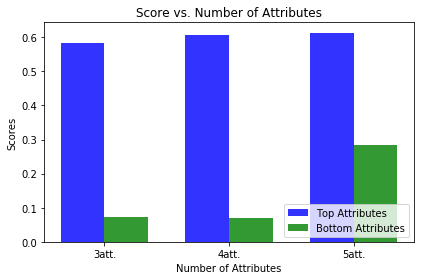

In [645]:
# data to plot
n_groups = 3
score_top = (top3, top4, top5)
score_bottom = (bottom3, bottom4, bottom5)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, score_top, bar_width, alpha=opacity, color='b', label='Top Attributes')

rects2 = plt.bar(index + bar_width, score_bottom, bar_width, alpha=opacity, color='g', label='Bottom Attributes')

plt.xlabel('Number of Attributes')
plt.ylabel('Scores')
plt.title('Score vs. Number of Attributes')
plt.xticks(index + .5 * bar_width, ("3att.", "4att.", "5att."))
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

"3att.", "4att.", "5att." refer to the most important attributes found by RFE above, respectively

<table>
    <tr>
        <td></td>
        <td>Score with top factors</td>
        <td>Score with bottom factors</td>
    </tr>
    <tr>
        <td>Three factors</td>
        <td>0.582</td>
        <td>0.0715</td>
    </tr>
    <tr>
        <td>Four factors</td>
        <td>0.605</td>
        <td>0.0695</td>
    </tr>
    <tr>
        <td>Five factors</td>
        <td>0.613</td>
        <td>0.283</td>
    </tr>
</table>

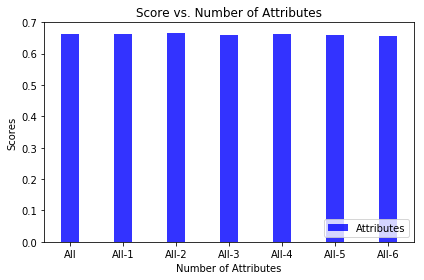

In [646]:
# data to plot
n_groups = 7
score_top = (allData, allExceptPop, allExceptPopHousehold, allNumbUrban, allHouseholdSize, allMedIncome, allpctWWage)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, score_top, bar_width, alpha=opacity, color='b', label='Attributes')

plt.xlabel('Number of Attributes')
plt.ylabel('Scores')
plt.title('Score vs. Number of Attributes')
plt.xticks(index, ("All", "All-1", "All-2", "All-3", "All-4", "All-5", "All-6"))
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

"All", "All-1", "All-2", "All-3", "All-4", "All-5", "All-6 " refer to the datasets resulting from removing column(s), respectively.  See above for what columns were removed to produce each dataset.

<table>
<tr>
<td>Attributes</td>
<td>Score</td>
</tr>
<tr>
<td>All (allData)</td>
<td>0.665</td>
</tr>
<tr>
<td>All - 1 (allExceptPop)</td>
<td>0.662</td>
</tr>
<tr>
<td>All - 2 (allExceptPopHousehold)</td>
<td>0.666</td>
</tr>
<tr>
<td>All - 3 (allNumbUrban)</td>
<td>0.658</td>
</tr>
<tr>
<td>All - 4 (allHouseholdSize)</td>
<td>0.662</td>
</tr>
<tr>
<td>All - 5 (allMedIncome)</td>
<td>0.660</td>
</tr>
<tr>
<td>All - 6 (allpctWWage)</td>
<td>0.657</td>
</tr>
</table>